# pandas

- 표 형식의 데이터를 다루는 데 특화
- Series, DataFrame

In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [3]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## pandas 자료구조

### Series

- 1차원 배열같은 자료구조(어떤 NumPy 자료형이라도 담을 수 있음)
- 색인(index)을 가지고 있음

In [7]:
obj = pd.Series([4, 7, -5, 3])

In [10]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [8]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [9]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [11]:
obj2['a']

-5

In [12]:
obj2['d'] = 6

In [13]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

In [15]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [16]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [17]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [18]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [19]:
'b' in obj2

True

In [20]:
'e' in obj2

False

- 딕셔너리 형태를 사용해서 Series 생성

In [21]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [22]:
# 색인을 직접 설정
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [23]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [24]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [25]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [26]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [27]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [28]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [29]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

### DataFrame

* 표 형식의 자료구조 


* 선언하는 방법
    - 같은 길이의 리스트를 포함하는 딕셔너리를 사용
    - Numpy 배열을 사용

In [30]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [31]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [35]:
frame.head()
# frame.tail()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [36]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [37]:
# 딕셔너리에 없는 값을 넘기면, 결측치(NaN)로 선언
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [42]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [43]:
frame2['state'] 

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [46]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [45]:
# 특정 row에 해당하는 값 : loc 
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [47]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [48]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [49]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [53]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [54]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [55]:
# 중첩된 딕셔너리 형태로 데이터프레임 선언하기
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [56]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [57]:
# 컬럼과 로우를 뒤집음
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [58]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [59]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [60]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

## 핵심기능

### 재색인(Reindexing) : reindex()

In [61]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [62]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [63]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [66]:
# ffill: 직전의 값으로 채워넣음
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [67]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [68]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [69]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


### 하나의 로우나 컬럼 삭제하기: drop()

In [70]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [71]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [74]:
obj = obj.drop(['d', 'c'])

In [75]:
obj

a    0.0
b    1.0
e    4.0
dtype: float64

In [76]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [77]:
# 디폴트: row값 삭제
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [80]:
# 컬럼값 삭제
data.drop('two', axis=1)
# data.drop(['two', 'four'], axis='columns')

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [82]:
# inplace 옵션: 원본 값을 모두 삭제함(주의)
data.drop('Ohio', inplace=True)
data

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### 선택, 필터링

In [83]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [84]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [85]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [86]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [87]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### loc와 iloc로 선택하기

* loc: 축이름을 사용해서 선택
* iloc: 인덱스(정수)를 사용해서 선택

In [88]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [89]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [90]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [91]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

### 산술연산과 데이터 정렬

In [92]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [93]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [94]:
# 짝이 맞다면 통합, 아니면 NaN
# 데이터베이스의 외부조인과 유사
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [95]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [96]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [97]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


#### 산술 연산 메서드에 채워 넣을 값 지정하기 : fill_value 옵션

In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))

In [98]:
df2.loc[1, 'b'] = np.nan

In [99]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [100]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [101]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [102]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


### 함수 적용과 매핑

In [103]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.204708,0.478943,-0.519439
Ohio,-0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,-1.296221


In [104]:
#NumPy의 유니버셜 함수(배열의 각 원소에 적용되는 메서드) 적용
np.abs(frame)

,b,d,e
Utah,0.204708,0.478943,0.519439
Ohio,0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,1.296221


#### 함수 적용: apply(f)

In [105]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.802165
d    1.684034
e    2.689627
dtype: float64

In [106]:
frame.apply(f, axis='columns')

Utah      0.998382
Ohio      2.521511
Texas     0.676115
Oregon    2.542656
dtype: float64

In [107]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-0.555730,0.281746,-1.296221
max,1.246435,1.965781,1.393406


#### 매핑: applymap(f), map(format)

In [109]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.20,0.48,-0.52
Ohio,-0.56,1.97,1.39
Texas,0.09,0.28,0.77
Oregon,1.25,1.01,-1.30


In [110]:
frame['e'].map(format)

Utah      -0.52
Ohio       1.39
Texas      0.77
Oregon    -1.30
Name: e, dtype: object

### 정렬(Sorting)과 순위(Ranking)

#### 정렬(Sorting) : sort_index(), sort_values()

In [111]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [112]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [113]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [114]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [115]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [116]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [117]:
obj = pd.Series([4, 7, -3, 2])

In [118]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [119]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [120]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [121]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [122]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


#### 순위(Ranking): rank()
- 1부터 순서를 매김
- 동점인 항목은 평균 순위를 반환

In [124]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [125]:
# 먼저 나타나는 값에 더 높은 랭킹 반환
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [126]:
# 동률인 경우, 그룹 내에서 높은 순위를 적용(1,2위 -> 2위)
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [127]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [128]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


## 통계 계산과 요약

In [129]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


### 합계: sum

In [130]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [131]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

### 평균: mean

In [132]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

### 최소값/최대값 : idxmin()/idxmax()

In [133]:
df.idxmax()

one    b
two    d
dtype: object

### 누적합 : cumsum()

In [134]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


###  ★여러개의 통계값 : describe

In [135]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [136]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### 상관관계와 공분산

In [137]:
conda install pandas-datareader

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    pandas-datareader-0.8.1    |             py_0          71 KB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  pandas-datareader  pkgs/main/noarch::pandas-datareader-0.8.1-py_0

The following packages will be UPDATED:

  conda                                        4.8.2-py37_0 --> 4.8.3-py37_0




conda-4.8.3          | 2.8 MB    |            |   0% 
conda-4.8.3          | 2.8 MB    | 7          |   8% 
conda-4.8.3          | 2.8 MB    | #7         |  17% 
conda-4.8.3          | 2.8 MB    |

In [ ]:
# price = pd.read_pickle('examples/yahoo_price.pkl')
# volume = pd.read_pickle('examples/yahoo_volume.pkl')

In [138]:
import pandas_datareader.data as web

# Yahoo! Finance 사이트에서 주식가격, 시가총액 읽어들이기
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

C:\Users\user\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [139]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2020-06-25,0.013276,0.022419,0.012636,0.006536
2020-06-26,-0.030726,-0.015458,-0.020016,-0.056496
2020-06-29,0.023047,0.021845,0.010747,0.025789
2020-06-30,0.008348,0.008518,0.025549,0.013362
2020-07-01,-0.001891,-0.018465,0.005847,0.017282


In [140]:
# 상관관계 계산
returns['MSFT'].corr(returns['IBM'])

0.5945241730017451

In [142]:
# 공분산 계산
returns['MSFT'].cov(returns['IBM'])

0.00016667001691033243

In [143]:
returns.MSFT.corr(returns.IBM)

0.5945241730017451

In [144]:
#데이터 프레임에서 상관관계
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.529410,0.714471,0.645939
IBM,0.529410,1.000000,0.594524,0.526392
MSFT,0.714471,0.594524,1.000000,0.751249
GOOG,0.645939,0.526392,0.751249,1.000000


In [145]:
#데이터 프레임에서 공분산
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000334,0.000156,0.000226,0.000204
IBM,0.000156,0.000261,0.000167,0.000147
MSFT,0.000226,0.000167,0.000301,0.000225
GOOG,0.000204,0.000147,0.000225,0.000298


In [146]:
#데이터 프레임과 시리즈의 상관관계
returns.corrwith(returns.IBM)

AAPL    0.529410
IBM     1.000000
MSFT    0.594524
GOOG    0.526392
dtype: float64

In [147]:
#데이터 프레임과 시리즈의 공분산
returns.corrwith(volume)

AAPL   -0.140546
IBM    -0.115411
MSFT   -0.066037
GOOG   -0.046732
dtype: float64

### 유일값 : unique()

In [148]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [149]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

### 갯수 세기: value_counts()

In [150]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [151]:
pd.value_counts(obj.values, sort=False)

d    1
a    3
c    3
b    2
dtype: int64

In [152]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [154]:
mask = obj.isin(['b', 'c'])

In [155]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

## 연습문제

코드제출

https://drive.google.com/drive/folders/149Ryp8xzvMnklI4bY7kF074tSsr5-H0c?usp=sharing

In [239]:
# https://finance.yahoo.com/
import pandas_datareader.data as web

df = web.DataReader('005930.KS','yahoo','2020-06-20','2020-07-02')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-22,52600,51800,52000,52000,13801350,52000
2020-06-23,52800,51100,52500,51400,18086152,51400
2020-06-24,53900,51600,51900,52900,24519552,52900
2020-06-25,53000,51900,52100,51900,18541624,51900
2020-06-26,53900,52200,52800,53300,21575360,53300
2020-06-29,53200,52000,52500,52400,17776925,52400
2020-06-30,53900,52800,53900,52800,21157172,52800
2020-07-01,53600,52400,53400,52600,16706143,52600
2020-07-02,52900,52100,52100,52500,7109371,52500


### 1. 삼성전자의 6월 주식을 데이터 프레임으로 만들기

In [287]:
df = web.DataReader('005930.KS','yahoo','2020-06-01','2020-06-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,51200,50600,50800,51200,16949183,51200
2020-06-02,51500,50800,51000,51400,14247933,51400
2020-06-03,55000,51700,51800,54500,49257814,54500
2020-06-04,57000,54600,55800,54600,40220334,54600
2020-06-05,55900,54000,54400,55500,22743629,55500
...,...,...,...,...,...,...
2020-06-24,53900,51600,51900,52900,24519552,52900
2020-06-25,53000,51900,52100,51900,18541624,51900
2020-06-26,53900,52200,52800,53300,21575360,53300


### 2. 종가('Close') 기준 가장 주가가 높았던 날짜 구하기

In [288]:
# 방법 1
df[df['Close'] == max(df['Close'])]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-05,55900,54000,54400,55500,22743629,55500
2020-06-09,56500,54400,55800,55500,23998831,55500


In [290]:
# 방법 2 : 동일한 값이 있을 때, 찾지 못하는 문제 있음
df['Close'].idxmax()

Timestamp('2020-06-05 00:00:00')

### 3. 종가('Close') 기준 가장 주가가 낮았던 날짜 구하기

In [291]:
# 방법1
df[df['Close'] == min(df['Close'])]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-15,52000,49900,51400,49900,28772921,49900


In [292]:
# 방법2
df['Close'].idxmin()

Timestamp('2020-06-15 00:00:00')

### 4. 종가('Close') 기준 6월 평균 주가 구하기

In [293]:
df['Close'].mean()

52986.36363636364

### 5. 종가('Close') 기준 주가가 52000원 이상이었던 날짜 구하기

In [294]:
df[df['Close'] > 52000].index

DatetimeIndex(['2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08',
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-24', '2020-06-26', '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

### 6. 종가('Close') 기준 데이터 정렬하기(가격 낮은 순)

In [295]:
# 동일한 코드임
# df.Close.sort_values()
df['Close'].sort_values()

Date
2020-06-15    49900
2020-06-01    51200
2020-06-23    51400
2020-06-02    51400
2020-06-25    51900
              ...  
2020-06-04    54600
2020-06-08    54900
2020-06-10    55400
2020-06-09    55500
2020-06-05    55500
Name: Close, Length: 22, dtype: int64

### 7. 종가('Close') 기준 데이터 정렬하기(가격 높은 순)

In [274]:
df['Close'].sort_values(ascending=False)

Date
2020-06-05    55500
2020-06-09    55500
2020-06-10    55400
2020-06-08    54900
2020-06-04    54600
              ...  
2020-06-25    51900
2020-06-02    51400
2020-06-23    51400
2020-06-01    51200
2020-06-15    49900
Name: Close, Length: 22, dtype: int64

### 8. 데이터프레임의 개수(row의 개수)를 구하기

In [296]:
# 방법1 

#row 갯수
df.shape[0]

#(참고)컬럼갯수
# df.shape[1]

22

In [297]:
len(df)

22

### 9. 'Date' 컬럼을 추가하고, 인덱스의 날짜 값을 저장하기

In [279]:
# 방법 1
# reset_index(): 기존의 index로 설정된 값을 초기화시키고, 컬럼으로 바꿔줌
df1 = df.reset_index()
df1

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-06-01,51200,50600,50800,51200,16949183,51200
1,2020-06-02,51500,50800,51000,51400,14247933,51400
2,2020-06-03,55000,51700,51800,54500,49257814,54500
3,2020-06-04,57000,54600,55800,54600,40220334,54600
4,2020-06-05,55900,54000,54400,55500,22743629,55500
...,...,...,...,...,...,...,...
17,2020-06-24,53900,51600,51900,52900,24519552,52900
18,2020-06-25,53000,51900,52100,51900,18541624,51900
19,2020-06-26,53900,52200,52800,53300,21575360,53300
20,2020-06-29,53200,52000,52500,52400,17776925,52400


In [248]:
# 방법 2: 새로운 필드 df['Date']를 만들어 index를 할당
df['Date'] = df.index
df

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2020-06-01,51200,50600,50800,51200,16949183,51200,2020-06-01
2020-06-02,51500,50800,51000,51400,14247933,51400,2020-06-02
2020-06-03,55000,51700,51800,54500,49257814,54500,2020-06-03
2020-06-04,57000,54600,55800,54600,40220334,54600,2020-06-04
2020-06-05,55900,54000,54400,55500,22743629,55500,2020-06-05
...,...,...,...,...,...,...,...
2020-06-24,53900,51600,51900,52900,24519552,52900,2020-06-24
2020-06-25,53000,51900,52100,51900,18541624,51900,2020-06-25
2020-06-26,53900,52200,52800,53300,21575360,53300,2020-06-26


### 10. 데이터 프레임의 인덱스를 1부터 오름차순으로 설정하기

In [ ]:
#방법 1
df.index = pd.RangeIndex(start=1, stop=len(df)+1, step=1)
#방법 2
df.index = range(1, len(df)+1)
#방법 3
df.index = np.arange(1,len(df)+1)
df

### 11. 'Year', 'Month', 'Date' 필드 추가하고 값을 저장하기

In [ ]:
# 방법1 : strftime 사용
df['Year']=0
df['Month']=0
df['Date']=0   

for i in range(len(df)):
    line = str(df['data'].values[i])
    df['Year'][i+1]=line[0:4]
    df['Month'][i+1]=line[5:7]
    df['Date'][i+1]=line[8:10]

# df.index에 datetime이 들어있는 상태였음
df['Year'] = df.index.strftime("%Y")
df['Month'] = df.index.strftime("%m")
df['Date'] = df.index.strftime("%d")

In [ ]:
# 방법2 : 'Date' 필드의 값을 year, month, date로 파싱하여 할당
df['Year'] = [d.year for d in df['Date']]
df['Month'] = [d.month for d in df['Date']]

In [253]:
# 방법3 : 함수를 만들어서 apply
def getYear2(date) :
    return date.year

df['Year2'] = df['Date'].apply(getYear2)

In [231]:
# 방법4 : 함수에서 list를 리턴하여 apply
def getYear(dates) :
    result = []
    for date in dates : 
        result.append(date.year)
    return result

def getMonth(dates) :
    result = []
    for date in dates : 
        result.append(date.month)
    return result

def getDay(dates) :
    result = []
    for date in dates : 
        result.append(date.day)
    return result
    
df['Year'] = getYear(df['Date'])
df['Month'] = getMonth(df['Date'])
df['Day'] = getDay(df['Date'])

### 12. 가격값을 ,가 들어가도록 변경하기(예: 53900 -> 53,900)

In [ ]:
# 방법1: lamda를 사용하여 apply
df['Close'] = df.Close.apply(lambda x : "{:,}".format(x))

In [233]:
# 방법2: def를 사용하여 apply
def f(x) :
    return "{0:,}".format(x)

df['Close'] = df['Close'].apply(f)


### 13. 데이터 시각화하기

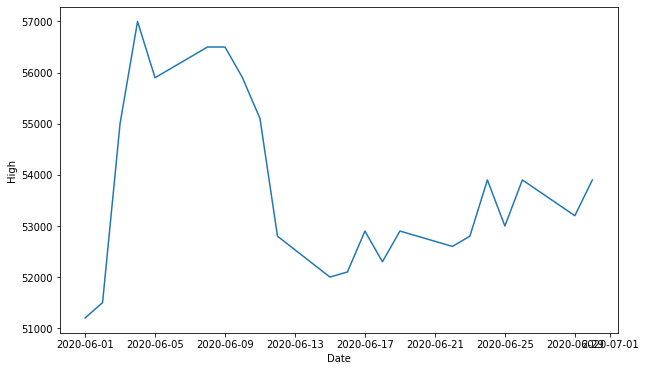

In [286]:
import seaborn as sns

sns.lineplot(x='Date', y='High', data=df1)